<h1>Data Insights</h1>

<h2>Importing required libraries</h2>

In [408]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import scipy.stats as ss
import dython
from dython.nominal import associations

<h2>Importing data</h2>

In [409]:
dataset = pd.ExcelFile('KPMG_dataset.xlsx')
df1 = pd.read_excel(dataset,'Transactions',skiprows=1)
df2 = pd.read_excel(dataset,'CustomerDemographic',skiprows=1)
df3 = pd.read_excel(dataset,'CustomerAddress',skiprows=1)
df4 = pd.read_excel(dataset,'NewCustomerList',skiprows=1)

<h3>Verifying whether the imports were successful</h3>

In [410]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [411]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [412]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


<h2>Merging columns for feature completion</h2>

In [413]:
df1 = df1.merge(df2,on='customer_id')

In [414]:
df1 = df1.merge(df3,on='customer_id')

In [415]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,4 Shopko Circle,2196,NSW,Australia,5


In [416]:
df4.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [417]:
df1.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure', 'address', 'postcode', 'state',
       'country', 'property_valuation'],
      dtype='object')

<h2>Dropping columns unnecessary for analysis</h2>

In [418]:
df4.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'],axis=1,inplace=True)

In [419]:
df1.drop(['transaction_date','default'],axis=1,inplace=True)

In [420]:
df1.columns

Index(['transaction_id', 'product_id', 'customer_id', 'online_order',
       'order_status', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [421]:
df1['past3']=df1['past_3_years_bike_related_purchases']

In [422]:
df1.drop(['past_3_years_bike_related_purchases'],axis=1,inplace=True)

<h2>Data types of the columns</h2>

In [423]:
df1.dtypes

transaction_id                      int64
product_id                          int64
customer_id                         int64
online_order                      float64
order_status                       object
brand                              object
product_line                       object
product_class                      object
product_size                       object
list_price                        float64
standard_cost                     float64
product_first_sold_date           float64
first_name                         object
last_name                          object
gender                             object
DOB                        datetime64[ns]
job_title                          object
job_industry_category              object
wealth_segment                     object
deceased_indicator                 object
owns_car                           object
tenure                            float64
address                            object
postcode                          

In [424]:
df1.drop('product_first_sold_date',axis=1,inplace=True)

<h2>Missing values</h2>

In [425]:
df1.isnull().sum()

transaction_id              0
product_id                  0
customer_id                 0
online_order              359
order_status                0
brand                     195
product_line              195
product_class             195
product_size              195
list_price                  0
standard_cost             195
first_name                  0
last_name                 642
gender                      0
DOB                       446
job_title                2379
job_industry_category    3222
wealth_segment              0
deceased_indicator          0
owns_car                    0
tenure                    446
address                     0
postcode                    0
state                       0
country                     0
property_valuation          0
past3                       0
dtype: int64

<h2>Summary statistics of the dataset</h2>

In [426]:
df1.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,tenure,postcode,property_valuation,past3
count,19968.000000,19968.000000,19968.000000,19609.000000,19968.000000,19773.000000,19522.000000,19968.000000,19968.000000,19968.000000
mean,9997.846504,45.365986,1740.254307,0.500688,1107.780004,556.091050,10.681949,2987.623347,7.516376,48.757412
std,5773.929973,30.750115,1009.819066,0.500012,582.852548,405.966472,5.674631,851.306647,2.824783,28.611359
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,1.000000,2000.000000,1.000000,0.000000
25%,4997.750000,18.000000,861.750000,0.000000,575.270000,215.140000,6.000000,2200.000000,6.000000,24.000000
50%,9996.500000,44.000000,1739.500000,1.000000,1163.890000,507.580000,11.000000,2767.000000,8.000000,48.000000
75%,14996.250000,72.000000,2614.250000,1.000000,1635.300000,795.100000,15.000000,3754.000000,10.000000,73.000000
max,20000.000000,100.000000,3500.000000,1.000000,2091.470000,1759.850000,22.000000,4883.000000,12.000000,99.000000


<h2>Unique values in each column</h2>

In [427]:
df1.nunique()

transaction_id           19968
product_id                 101
customer_id               3489
online_order                 2
order_status                 2
brand                        6
product_line                 4
product_class                3
product_size                 3
list_price                 294
standard_cost              100
first_name                2835
last_name                 3263
gender                       6
DOB                       3047
job_title                  195
job_industry_category        9
wealth_segment               3
deceased_indicator           2
owns_car                     2
tenure                      22
address                   3487
postcode                   835
state                        5
country                      1
property_valuation          12
past3                      100
dtype: int64

<h2>Exploratory Data Analysis</h2>

<h3>Generating age feature from DOB</h3>

In [428]:
df1['age'] = (pd.datetime.today().year - df1['DOB'].dt.year)

<h3>Correlation heatmap among all features</h3>

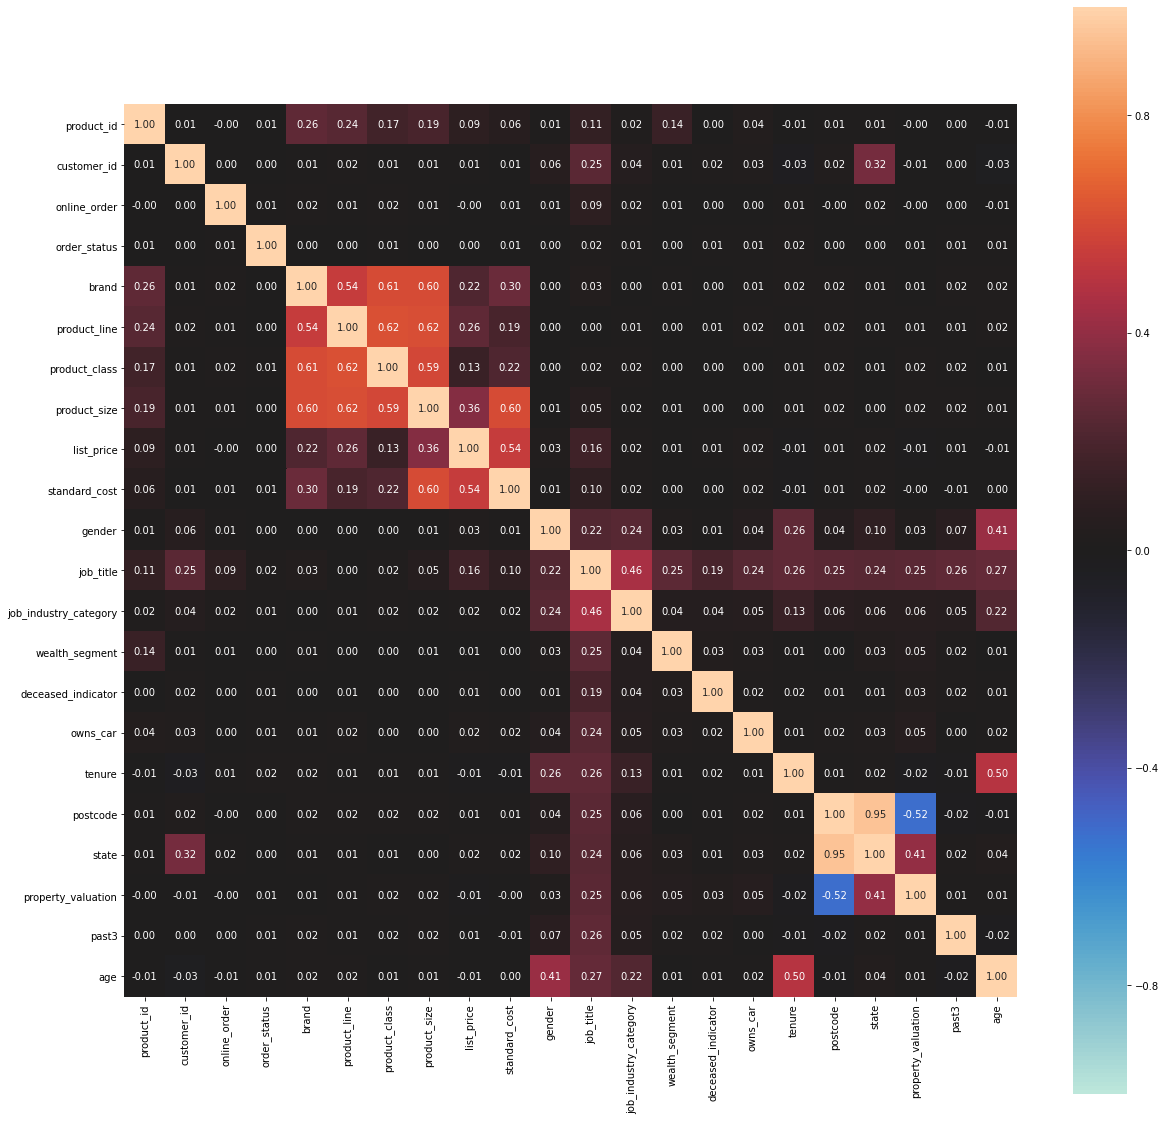

{'corr':                        product_id  customer_id  online_order  order_status  \
 product_id               1.000000     0.005322     -0.004669      0.006807   
 customer_id              0.005322     1.000000      0.001687      0.001791   
 online_order            -0.004669     0.001687      1.000000      0.009037   
 order_status             0.006807     0.001791      0.009037      1.000000   
 brand                    0.260650     0.012029      0.021458      0.000000   
 product_line             0.239393     0.020372      0.013973      0.000000   
 product_class            0.167806     0.010321      0.020950      0.011200   
 product_size             0.189470     0.013548      0.012521      0.000000   
 list_price               0.089925     0.010255     -0.001827      0.003417   
 standard_cost            0.057778     0.006584      0.006809      0.006264   
 gender                   0.010859     0.061410      0.012053      0.000000   
 job_title                0.111566     0.245

In [429]:
cols = [col for col in df1.columns if col not in ['first_name', 'last_name','transaction_id','address','DOB','country']]
associations(df1[cols],figsize=(20,20))

<h3>Data analysis w.r.t gender</h3>

In [430]:
df1.gender.value_counts()

Female    9979
Male      9510
U          455
F           11
Femal        7
M            6
Name: gender, dtype: int64

The data is not clean, there are some discrepancies and mislabeled values, we will proceed to replace them with the appropriate tags

In [431]:
df1.gender.replace({'F':'Female','Femal':'Female','M':'Male'},inplace=True)

Female    9997
Male      9516
U          455
Name: gender, dtype: int64


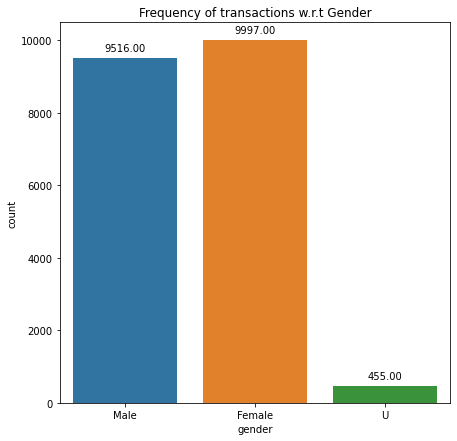

In [432]:
plt.figure(figsize=(7,7))
print(df1.gender.value_counts())
splot = sns.countplot(df1.gender)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Frequency of transactions w.r.t Gender')
plt.show()

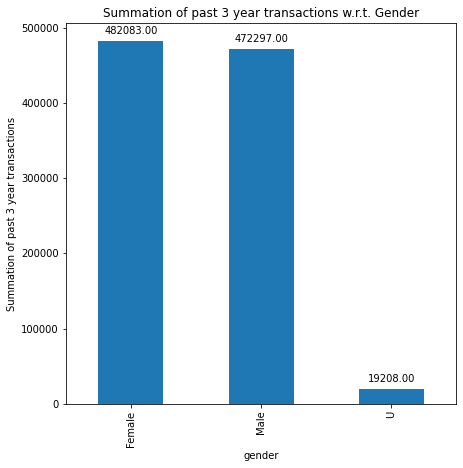

In [433]:
plt.figure(figsize=(7,7))
splot = df1.groupby('gender').past3.sum().plot(kind='bar')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Summation of past 3 year transactions')
plt.title('Summation of past 3 year transactions w.r.t. Gender')
plt.show()

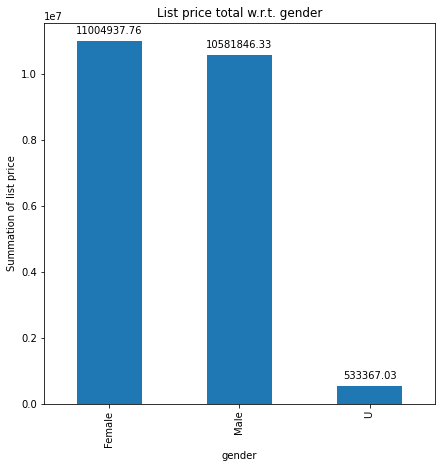

In [434]:
plt.figure(figsize=(7,7))
splot = df1.groupby('gender').list_price.sum().plot(kind='bar')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Summation of list price')
plt.title('List price total w.r.t. gender')
plt.show()

gender
Female    48.222767
Male      49.631883
U         42.215385
Name: past3, dtype: float64


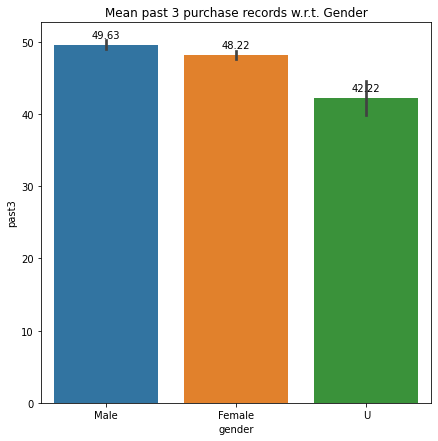

In [435]:
plt.figure(figsize=(7,7))
splot = sns.barplot(x='gender',y='past3',data=df1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
print(df1.groupby('gender').past3.mean())
plt.title('Mean past 3 purchase records w.r.t. Gender')
plt.show()

<h3>Data analysis with respect to state</h3>

In [436]:
df1.state.value_counts()

NSW                10200
VIC                 4541
QLD                 4262
New South Wales      485
Victoria             480
Name: state, dtype: int64

We see that the data is not clean, there are repeated labels with different values. We will proceed to group them up.

In [437]:
df1.replace({'New South Wales':'NSW','Victoria':'VIC'},inplace=True)

NSW    10685
VIC     5021
QLD     4262
Name: state, dtype: int64


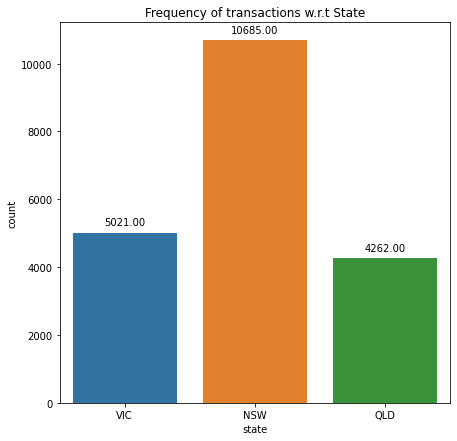

In [438]:
plt.figure(figsize=(7,7))
print(df1.state.value_counts())
splot = sns.countplot(df1.state)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Frequency of transactions w.r.t State')
plt.show()

In [439]:
df1[df1['age']>90].age

5894    177.0
5895    177.0
5896    177.0
5897    177.0
5898    177.0
5899    177.0
5900    177.0
5901    177.0
5902    177.0
Name: age, dtype: float64

These transactions are mislabeled. A customer cannot have the age of 177, we will proceed to remove these from our analysis.

In [440]:
df1 = df1[df1['age']<100]

In [441]:
df1.age

0        65.0
1        65.0
2        65.0
3        41.0
4        41.0
         ... 
19963    23.0
19964    28.0
19965    28.0
19966    53.0
19967    53.0
Name: age, Length: 19513, dtype: float64

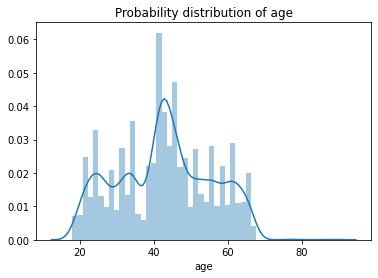

In [454]:
sns.distplot(df1.age)
plt.title('Probability distribution of age')
plt.show()

Now our data seems to be in a much more normalised format

<h3>Data analysis with respect to age</h3>

<Figure size 720x720 with 0 Axes>

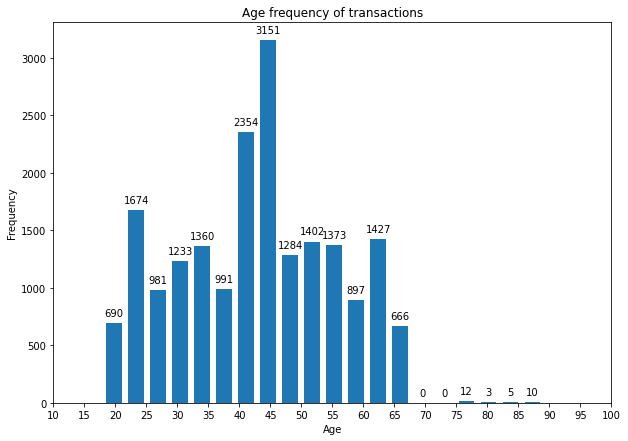

In [443]:
plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(10, 7))
ax.hist(df1.age, bins=20,rwidth=0.7)

for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
plt.xticks(range(10,105,5))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age frequency of transactions')
plt.show()

We see that the age demographic between 40-47 is the highest, this is the target demographic for the transactions.

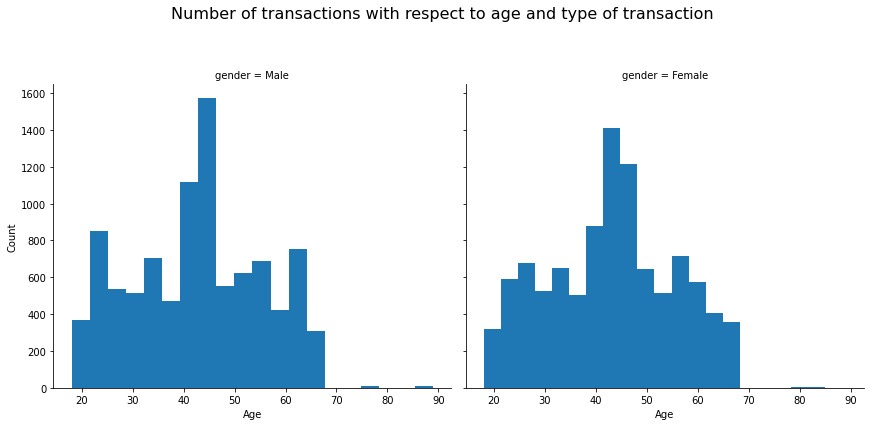

In [444]:
s = sns.FacetGrid(df1,col='gender',size=6)
s.map(plt.hist,'age',bins=20).set_axis_labels('Age','Count')
s.fig.subplots_adjust(top=0.8)
s.fig.suptitle('Number of transactions with respect to age and type of transaction', fontsize=16)
plt.show()

We note similar trends for both males and females here

<h3>Analysis with respect to Job industry</h3>

Manufacturing         4000
Financial Services    3841
Health                3074
Retail                1758
Property              1289
IT                     699
Entertainment          698
Argiculture            578
Telecommunications     354
Name: job_industry_category, dtype: int64


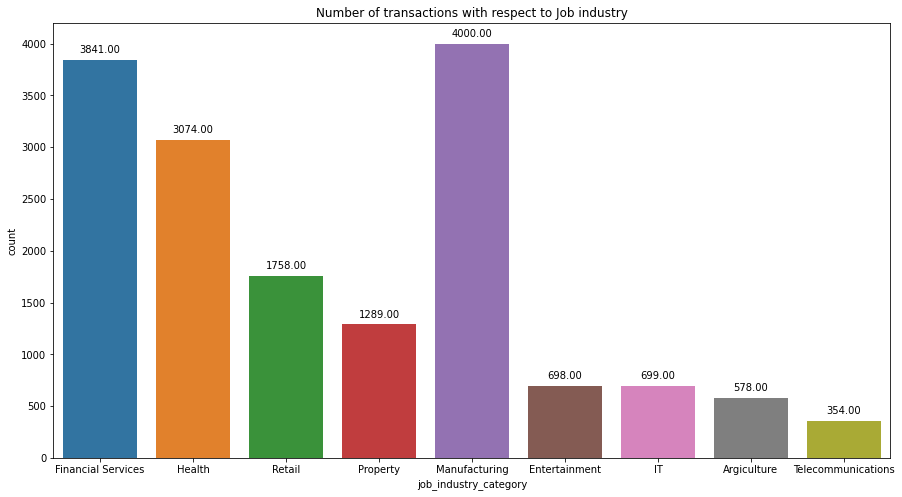

In [445]:
plt.figure(figsize=(15,8))
print(df1.job_industry_category.value_counts())
splot = sns.countplot(df1.job_industry_category)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Number of transactions with respect to Job industry')
plt.show()

Manufacturing         4000
Financial Services    3841
Health                3074
Retail                1758
Property              1289
IT                     699
Entertainment          698
Argiculture            578
Telecommunications     354
Name: job_industry_category, dtype: int64


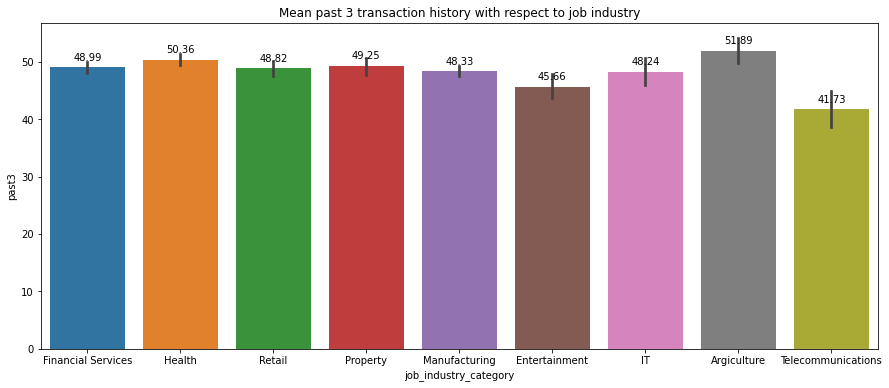

In [476]:
plt.figure(figsize=(15,6))
print(df1.job_industry_category.value_counts())
splot = sns.barplot(x=df1.job_industry_category,y=df1.past3)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Mean past 3 transaction history with respect to job industry')
plt.show()

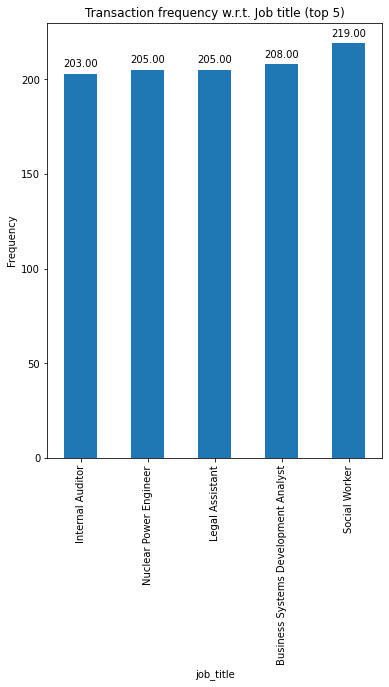

In [472]:
plt.figure(figsize=(6,8))
splot = df1.groupby('job_title').transaction_id.count().sort_values()[-5:].plot(kind='bar')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Transaction frequency w.r.t. Job title (top 5)')
plt.ylabel('Frequency')
plt.show()

<h3>Analysis with respect to wealth segment</h3>

Mass Customer        9783
High Net Worth       4965
Affluent Customer    4765
Name: wealth_segment, dtype: int64


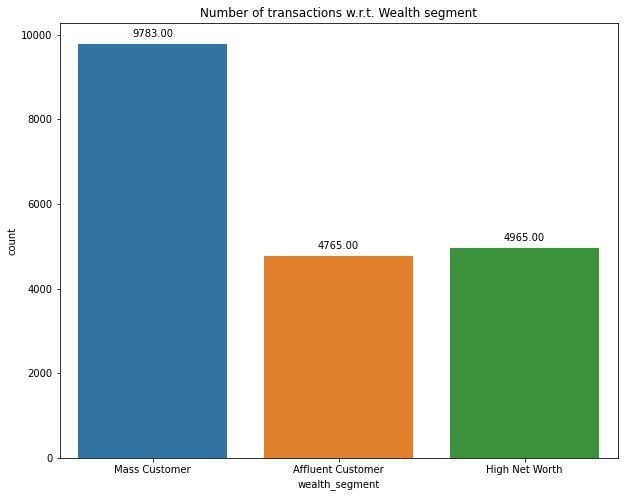

In [447]:
plt.figure(figsize=(10,8))
print(df1.wealth_segment.value_counts())
splot = sns.countplot(df1.wealth_segment)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Number of transactions w.r.t. Wealth segment')
plt.show()

wealth_segment
Affluent Customer    49.716684
High Net Worth       48.019738
Mass Customer        48.968823
Name: past3, dtype: float64


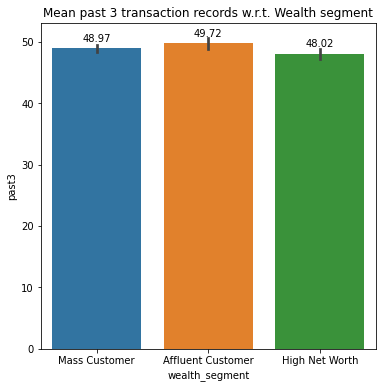

In [448]:
plt.figure(figsize=(6,6))
print(df1.groupby('wealth_segment').past3.mean())
splot = sns.barplot(x='wealth_segment',y='past3',data=df1)
plt.title('Mean past 3 transaction records w.r.t. Wealth segment')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

wealth_segment
Affluent Customer    1110.115626
High Net Worth       1102.595172
Mass Customer        1106.275999
Name: list_price, dtype: float64


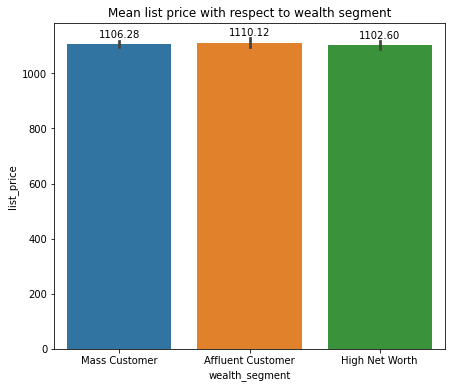

In [449]:
plt.figure(figsize=(7,6))
splot = sns.barplot(x='wealth_segment',y='list_price',data=df1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
print(df1.groupby('wealth_segment').list_price.mean())
plt.title('Mean list price with respect to wealth segment')
plt.show()

state
NSW    49.269986
QLD    48.909897
VIC    48.141777
Name: past3, dtype: float64


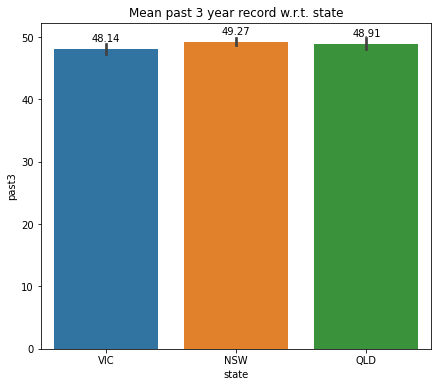

In [451]:
plt.figure(figsize=(7,6))
splot = sns.barplot(x='state',y='past3',data=df1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
print(df1.groupby('state').past3.mean())
plt.title('Mean past 3 year record w.r.t. state')
plt.show()

state
NSW    1100.402260
QLD    1116.863324
VIC    1109.787912
Name: list_price, dtype: float64


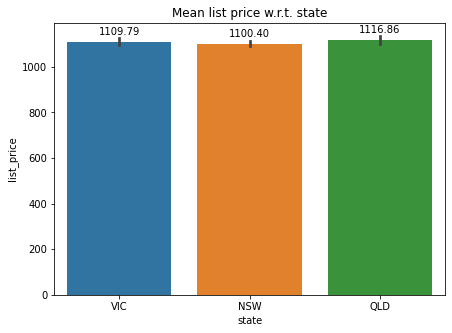

In [452]:
plt.figure(figsize=(7,5))
splot = sns.barplot(x='state',y='list_price',data=df1)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
print(df1.groupby('state').list_price.mean())
plt.title('Mean list price w.r.t. state')
plt.show()

<h3>Number of cars in every state</h3>

state
NSW    5087
QLD    2089
VIC    2551
Name: owns_car, dtype: int64


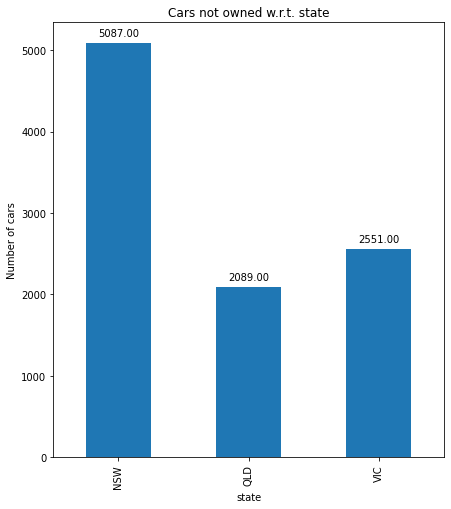

In [483]:
plt.figure(figsize=(7,8))
df2 = df1[df1.owns_car=='No']
print(df2.groupby('state').owns_car.count())
splot = df2.groupby('state').owns_car.count().plot(kind='bar')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Cars not owned w.r.t. state')
plt.ylabel('Number of cars')
plt.show()